In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import librosa
import cv2
import os

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
def load_encoder(path):
    return pickle.load(open(path, "rb"))

In [4]:
encoder = load_encoder("encoder.pkl")

In [5]:
def load_test_data(directory, n_mfcc=13, max_len=500, resize_size=(75, 75)):
    files = os.listdir(directory)
    for file in files:
        path = directory + "/" + file
        filename, ext = file.split(".")
        if ext == "mp3":
            audio, sr = librosa.load(path)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
            mfcc = np.transpose(mfcc)
            mfcc = pad_sequences([mfcc], maxlen=max_len, padding="post", truncating="post")[0]
        elif ext == "png":
            good_img = cv2.imread(path)
            img = cv2.resize(good_img, resize_size)
    
    img = np.expand_dims(img, axis=0)
    mfcc = np.expand_dims(mfcc, axis=0)
    
    return img, mfcc, good_img

In [6]:
img, mfcc, good_img = load_test_data("test")

In [7]:
model = tf.keras.models.load_model("best_model_fusion.h5")

In [8]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 500, 13)]    0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 73, 73, 64)   1792        ['input_11[0][0]']               
                                                                                                  
 conv1d_13 (Conv1D)             (None, 498, 64)      2560        ['input_12[0][0]']               
                                                                                            

In [9]:
pred = np.argmax(model.predict([img, mfcc], verbose=0), axis=1)
label = encoder.inverse_transform(pred)[0]

Text(0.5, 1.0, 'Genre prédit: rock')

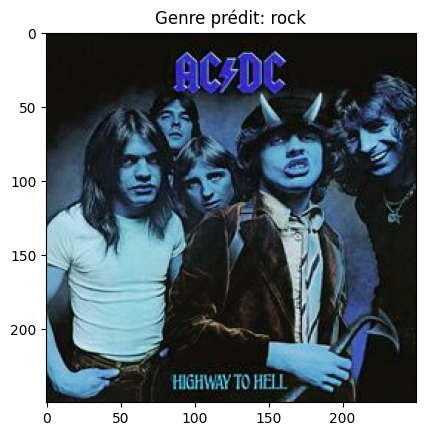

In [10]:
plt.imshow(good_img)
plt.title("Genre prédit: {}".format(label))